In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import imshow
import numpy as np
import cv2
import torch
from glob import glob
import albumentations as albu
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image
from people_segmentation.pre_trained_models import create_model


In [8]:
model = create_model("Unet_2020-07-20")
model.eval();

In [50]:
def semantin_show(filename):
    image = load_rgb(filename)
    transform = albu.Compose([albu.Normalize(p=1)], p=1)
    padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
    x = transform(image=padded_image)["image"]
    x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
    with torch.no_grad():
        prediction = model(x)[0][0]
    mask = (prediction > 0).cpu().numpy().astype(np.uint8)
    mask3d = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    
    kk = image*mask3d
    kk = cv2.cvtColor(kk, cv2.COLOR_RGB2BGR)
    mask = unpad(mask, pads)
    dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)
    return kk

In [51]:
im = semantin_show(filename)

In [52]:
all_files = glob('../Market-1501-v15.09.15/query/*')

In [53]:
n = 32
identified=[]
for i in range(n):
    filename = all_files[i]
    im = semantin_show(filename)
    identified.append(im)

4 8


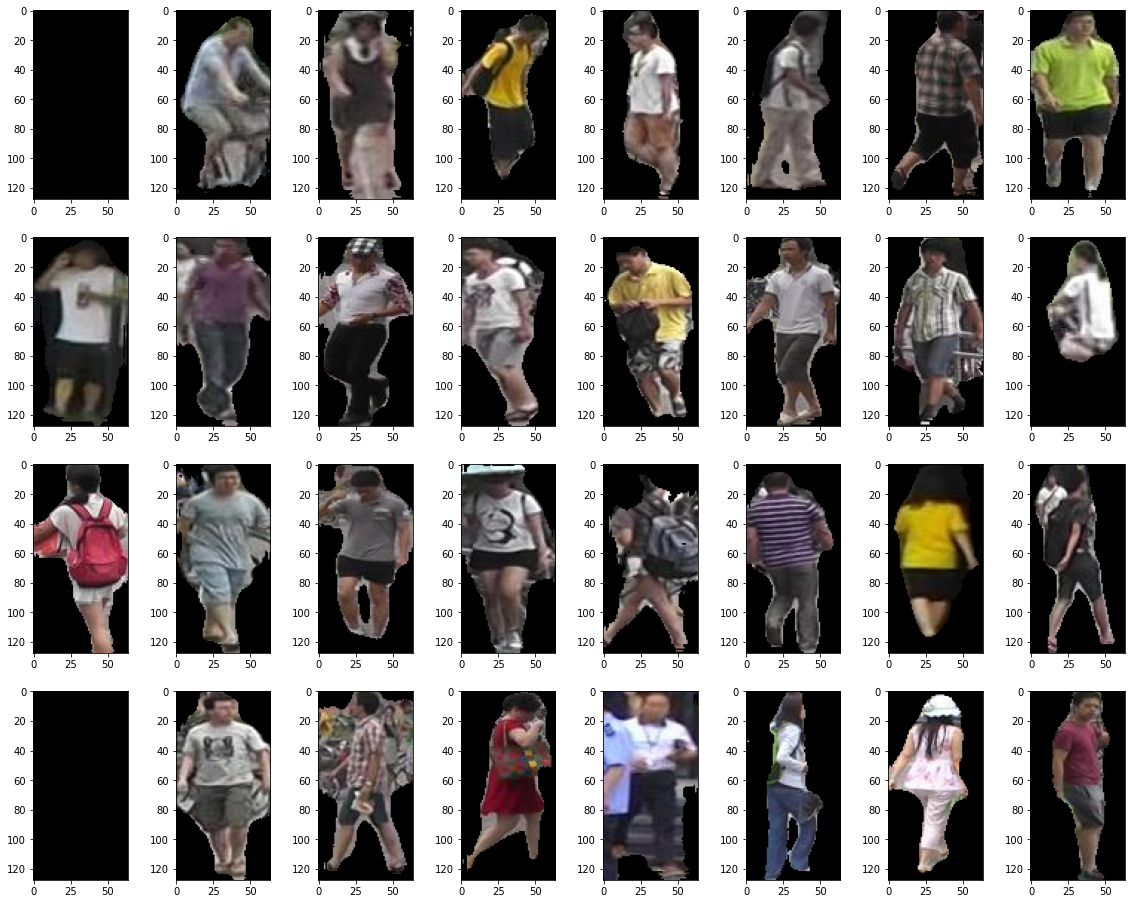

In [54]:
row = int(np.ceil(n/8))
column = 8
print(row,column)
fig, axs = plt.subplots(row,column, figsize=(20, row*4))
i = 0
for ax in axs:
    if row == 1:
        ax = [ax]
    for a in ax:
        if i<len(identified):
            img = identified[i]
            im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            a.imshow(im_rgb)
            i = i+1

plt.show()